In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import statsmodels.formula.api as smf

In [2]:
##import data
df = pd.read_csv("P://Python/paid_search_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 18 columns):
Month                  31 non-null object
Sessions               31 non-null int64
Potential_Revenue      18 non-null float64
Reservations           31 non-null int64
Cost                   31 non-null float64
CVR                    31 non-null float64
Avg_Rev_per_Trans      18 non-null float64
Open_Rooms             31 non-null int64
Rented_Rooms           31 non-null int64
Occupancy              31 non-null float64
Avg_Web_Price          31 non-null float64
Per_Visit_Value        18 non-null float64
Clicks                 31 non-null int64
Click_Through_Rate     31 non-null float64
Cost_per_Click         31 non-null float64
Revenue_per_Click      18 non-null float64
Total_Reservations     31 non-null int64
Percent_Paid_Search    31 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 4.4+ KB


In [4]:
## basic statistics about the imported data
df.describe()

,Sessions,Potential_Revenue,Reservations,Cost,CVR,Avg_Rev_per_Trans,Open_Rooms,Rented_Rooms,Occupancy,Avg_Web_Price,Per_Visit_Value,Clicks,Click_Through_Rate,Cost_per_Click,Revenue_per_Click,Total_Reservations,Percent_Paid_Search
count,31.000000,18.000000,31.000000,31.000000,31.000000,18.000000,31.000000,31.000000,31.000000,31.000000,18.000000,31.000000,31.000000,31.000000,18.000000,31.000000,31.000000
mean,12372.193548,42956.833333,304.870968,77155.591935,2.481613,129.713333,3374.096774,51602.612903,0.938387,137.204516,3.318333,10197.967742,0.981290,8.368065,4.053889,701.387097,0.488710
std,3288.371263,17591.834975,119.241140,34274.368708,0.616177,24.567226,1041.756669,1202.802967,0.019510,26.009648,0.949367,3406.207593,1.335225,2.705433,1.151276,366.832721,0.173277
min,8954.000000,18573.000000,125.000000,23930.450000,1.100000,95.810000,1476.000000,50079.000000,0.910000,103.360000,1.680000,6883.000000,0.190000,2.410000,1.940000,225.000000,0.200000
25%,10589.500000,NaN,233.500000,48775.285000,2.030000,NaN,2706.500000,50465.000000,0.920000,118.590000,NaN,8715.500000,0.460000,6.630000,NaN,435.500000,0.370000
50%,11537.000000,NaN,285.000000,77458.520000,2.590000,NaN,3521.000000,51884.000000,0.940000,130.940000,NaN,9363.000000,0.750000,8.810000,NaN,658.000000,0.430000
75%,12800.500000,NaN,349.000000,94094.595000,2.895000,NaN,4146.000000,52096.000000,0.950000,149.310000,NaN,10259.000000,1.120000,10.435000,NaN,806.000000,0.635000
max,26508.000000,82462.000000,640.000000,192555.500000,3.710000,174.140000,4951.000000,54118.000000,0.970000,200.950000,4.770000,24024.000000,7.860000,12.640000,6.180000,1667.000000,0.980000


In [5]:
df.corr()

,Sessions,Potential_Revenue,Reservations,Cost,CVR,Avg_Rev_per_Trans,Open_Rooms,Rented_Rooms,Occupancy,Avg_Web_Price,Per_Visit_Value,Clicks,Click_Through_Rate,Cost_per_Click,Revenue_per_Click,Total_Reservations,Percent_Paid_Search
Sessions,1.000000,0.756170,0.777294,0.671250,0.151451,-0.114416,0.012783,0.100733,0.016127,0.087239,0.063590,0.907620,-0.138074,-0.027492,-0.001422,0.630160,-0.075634
Potential_Revenue,0.756170,1.000000,0.907945,0.860953,0.577286,0.127176,-0.223945,0.315278,0.234886,0.376697,0.689377,0.728169,-0.105029,0.149982,0.643843,0.868633,0.407509
Reservations,0.777294,0.907945,1.000000,0.739041,0.733250,-0.285366,-0.162554,0.192052,0.170987,0.034604,0.491653,0.640611,0.019350,0.279864,0.489777,0.843740,-0.135799
Cost,0.671250,0.860953,0.739041,1.000000,0.444909,0.046512,-0.307656,0.446295,0.328535,0.180150,0.369362,0.573884,-0.064841,0.695332,0.295409,0.835320,-0.512345
CVR,0.151451,0.577286,0.733250,0.444909,1.000000,-0.349655,-0.292189,0.216768,0.275837,-0.049537,0.747070,0.046347,0.201561,0.472850,0.812647,0.614735,-0.097199
Avg_Rev_per_Trans,-0.114416,0.127176,-0.285366,0.046512,-0.349655,1.000000,-0.407050,0.623013,0.433248,0.901239,0.349739,-0.038780,-0.132738,0.076138,0.227315,-0.163680,-0.420075
Open_Rooms,0.012783,-0.223945,-0.162554,-0.307656,-0.292189,-0.407050,1.000000,-0.945411,-0.989866,-0.596002,-0.620460,-0.021006,-0.419858,-0.308465,-0.548061,-0.311427,0.380166
Rented_Rooms,0.100733,0.315278,0.192052,0.446295,0.216768,0.623013,-0.945411,1.000000,0.939653,0.692272,0.608174,0.108517,0.317361,0.409107,0.485826,0.379689,-0.487473
Occupancy,0.016127,0.234886,0.170987,0.328535,0.275837,0.433248,-0.989866,0.939653,1.000000,0.581588,0.600178,0.068225,0.382418,0.299907,0.509291,0.311349,-0.368415
Avg_Web_Price,0.087239,0.376697,0.034604,0.180150,-0.049537,0.901239,-0.596002,0.692272,0.581588,1.000000,0.578572,0.084256,0.086906,0.058913,0.438298,0.138744,-0.230434


In [25]:
df.corr()['Reservations']

Sessions               0.777294
Potential_Revenue      0.907945
Reservations           1.000000
Cost                   0.739041
CVR                    0.733250
Avg_Rev_per_Trans     -0.285366
Open_Rooms            -0.162554
Rented_Rooms           0.192052
Occupancy              0.170987
Avg_Web_Price          0.034604
Per_Visit_Value        0.491653
Clicks                 0.640611
Click_Through_Rate     0.019350
Cost_per_Click         0.279864
Revenue_per_Click      0.489777
Total_Reservations     0.843740
Percent_Paid_Search   -0.135799
Name: Reservations, dtype: float64

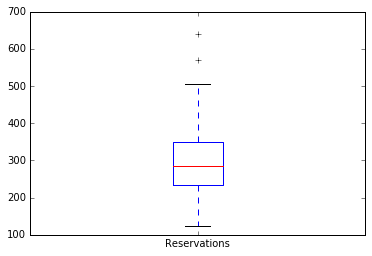

In [11]:
df[['Reservations']].plot(kind = 'box')

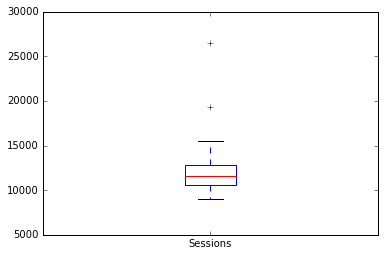

In [16]:
df[['Sessions']].plot(kind = 'box') 

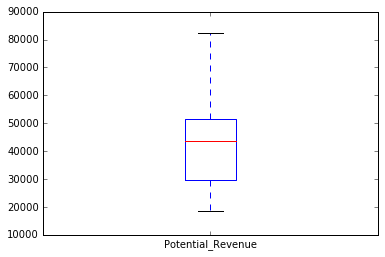

In [17]:
df[['Potential_Revenue']].plot(kind = 'box') 

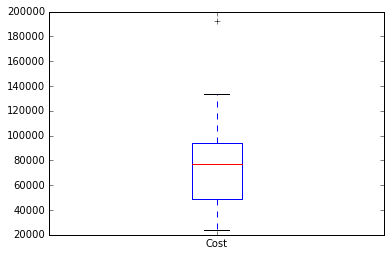

In [8]:
df[['Cost']].plot(kind = 'box')

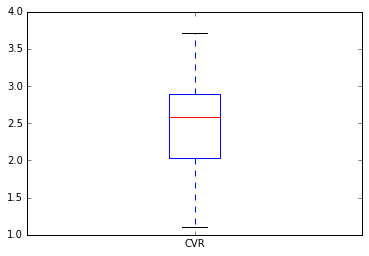

In [15]:
df[['CVR']].plot(kind = 'box') 

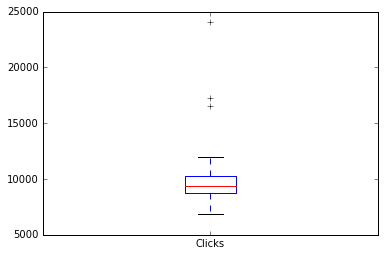

In [18]:
df[['Clicks']].plot(kind = 'box') 

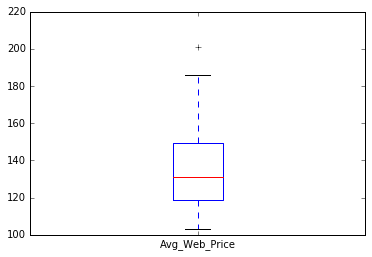

In [19]:
df[['Avg_Web_Price']].plot(kind = 'box') 

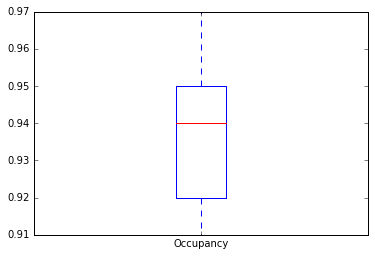

In [20]:
df[['Occupancy']].plot(kind = 'box') 

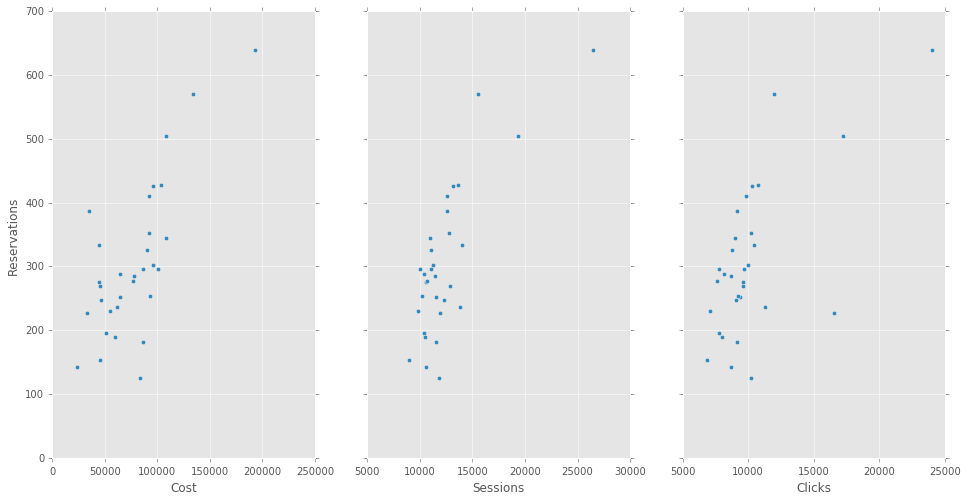

In [21]:
# Making the graphs a bit prettier
plt.style.use('ggplot')

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Cost', y='Reservations', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Sessions', y='Reservations', ax=axs[1])
df.plot(kind='scatter', x='Clicks', y='Reservations', ax=axs[2])

In [24]:
# create a fitted linear regression model using only Cost, Sessions and Clicks because they most correlated to Reservations
# I didn't use Potential Revenue, CVR or Total Reservations because they are calculated using Reservations
lm = smf.ols(formula='Reservations ~ Cost + Sessions + Clicks', data=df).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     21.51
Date:                Thu, 18 Aug 2016   Prob (F-statistic):           2.52e-07
Time:                        10:23:45   Log-Likelihood:                -172.77
No. Observations:                  31   AIC:                             353.5
Df Residuals:                      27   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -46.2098     50.423     -0.916      0.368      -149.668    57.249
Cost           0.0013      0.000      2.654      0.013         0.000     0.002
Sessions       0.0286      0.010      2.853      0.008         0.008     0.049
Clicks        -0.0102      0.009     -1.167      0.253        -0.028     0.008
==============================================================================
Omnibus:                        2.145   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.097
Skew:                          -0.417   Prob(JB):                        0.578
Kurtosis:                       3.392   Cond. No.                     3.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## Since 0 is in the confidence interval for the coefficient of Clicks, I am going to remove Clicks from the model

In [23]:
# create a fitted linear regression model using only Cost and Sessions as the independent variables
lm = smf.ols(formula='Reservations ~ Cost + Sessions', data=df).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     31.18
Date:                Thu, 18 Aug 2016   Prob (F-statistic):           7.53e-08
Time:                        10:22:53   Log-Likelihood:                -173.54
No. Observations:                  31   AIC:                             353.1
Df Residuals:                      28   BIC:                             357.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -30.9094     49.004     -0.631      0.533      -131.290    69.471
Cost           0.0014      0.000      2.786      0.009         0.000     0.002
Sessions       0.0186      0.005      3.606      0.001         0.008     0.029
==============================================================================
Omnibus:                        2.284   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.083
Skew:                          -0.303   Prob(JB):                        0.582
Kurtosis:                       3.687   Cond. No.                     3.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# This model produced an R^2 of 0.69

In [27]:
# create a fitted linear regression model using only Cost as the independent variable
lm = smf.ols(formula='Reservations ~ Cost', data=df).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     34.90
Date:                Thu, 18 Aug 2016   Prob (F-statistic):           2.05e-06
Time:                        10:43:53   Log-Likelihood:                -179.45
No. Observations:                  31   AIC:                             362.9
Df Residuals:                      29   BIC:                             365.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    106.4934     36.645      2.906      0.007        31.546   181.441
Cost           0.0026      0.000      5.908      0.000         0.002     0.003
==============================================================================
Omnibus:                        0.954   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.189
Skew:                           0.014   Prob(JB):                        0.910
Kurtosis:                       3.381   Cond. No.                     2.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# This model produced an R^2 of 0.546
# I think I am going to do a Time Series Analysis to see if there is a better model